In [20]:
import numpy as np
import pandas as pd
import datetime
import pytz
import matplotlib.pyplot as plt

In [21]:
articles = np.load("./data/articles.npy", allow_pickle=True).item()
utc=pytz.UTC

# Find the date range of articles
datetimes = []
for abv, article_list in articles.items():
  for article in article_list:
    if article["date"] != None:
      datetimes.append(article["date"].replace(tzinfo=utc))

print(min(datetimes), max(datetimes))

2004-02-19 00:00:00+00:00 2022-05-31 00:00:00+00:00


In [22]:
# Example files from 4/14/22 meeting
#print(articles["en"][1000])
#print(articles["ru"][1000])
#print(articles["zh"][1000])

Combined 9390
English articles 907
Russian articles 1302
Chinese articles 7181


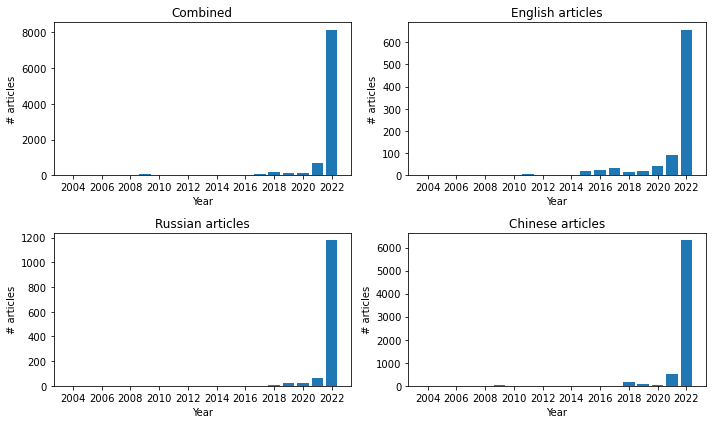

In [24]:
# Plot number of articles vs. year for all articles and seperated by langauge
fig = plt.figure(figsize=(10, 6))
article_sets = [articles["en"] + articles["ru"] + articles["zh"], articles["en"], articles["ru"], articles["zh"]]
article_titles = ["Combined", "English articles", "Russian articles", "Chinese articles"]

for i in range(len(article_sets)):
  title = article_titles[i]
  year_bins = np.zeros(19, dtype=int)
  x = np.array(list(range(0, 19))) + 2004
  count = 0

  for article in article_sets[i]:
    if article["date"] != None:
      year_bins[article["date"].year - 2004] += 1
      count += 1

  print(title + " " + str(count))
  plt.subplot(2, 2, i + 1)
  plt.bar(x, year_bins)
  plt.xticks(x[::2])
  plt.xlabel("Year")
  #plt.yscale("log")
  plt.ylabel("# articles")
  plt.title(title)
plt.tight_layout()